# Volcano plot using Plotly

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
#import some data
df = pd.read_csv("volcano_data.txt", sep="\t")
df.head()

ENTREZID   SYMBOL                                           GENENAME  \
0     12992  Csn1s2b                             casein alpha s2-like B   
1     13358  Slc25a1  solute carrier family 25 (mitochondrial carrie...   
2     11941   Atp2b2       ATPase, Ca++ transporting, plasma membrane 2   
3     20531  Slc34a2  solute carrier family 34 (sodium phosphate), m...   
4    100705    Acacb                 acetyl-Coenzyme A carboxylase beta   

      logFC   AveExpr          t       P.Value     adj.P.Val  
0 -8.603611  3.562950 -43.796498  3.830650e-15  6.053959e-11  
1 -4.124175  5.779699 -29.907849  1.758595e-13  1.389642e-09  
2 -7.386986  1.282143 -27.819499  4.836363e-13  2.432800e-09  
3 -4.177812  4.278629 -27.072723  6.157428e-13  2.432800e-09  
4 -4.314320  4.440914 -25.223566  1.499977e-12  4.741129e-09

In [3]:
#define significant fc and p-val thresholds
p_thresh = 0.001
fc_thresh = 3

In [4]:
#assign colour based on significance
def is_significant(fc, p_val):
    if p_val < p_thresh:
        if fc > fc_thresh:
            return 'red'
        if fc < -1*fc_thresh:
            return 'blue'
    return 'gray'

color = df.apply(lambda x: is_significant(x["logFC"],x['adj.P.Val']), axis= 1)

In [5]:
#if you want to highlight some gene of interest list them here
gene_of_interest = ["Egf", "Ctgf", "Rbp1", "Eef2k"]
color_highlight='black'

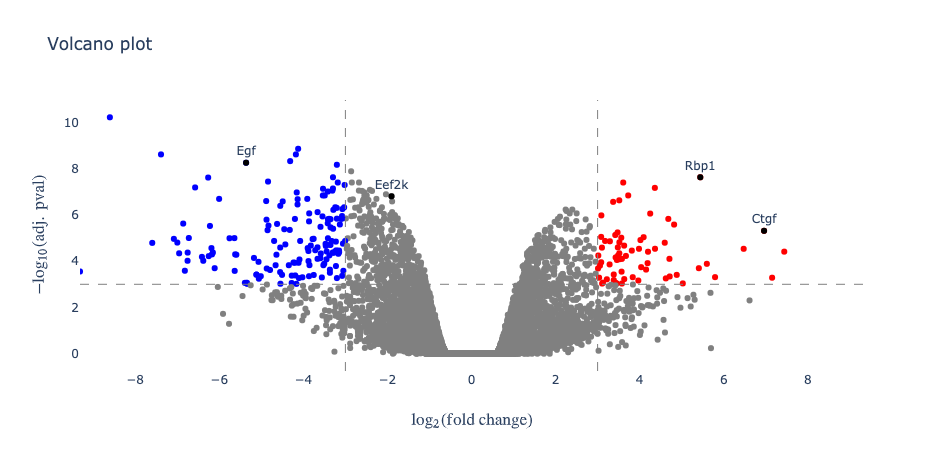

In [6]:
#draw plot
data= [go.Scatter(
    x= df['logFC'],
    y= -1*np.log10(df['adj.P.Val']),
    text= df['SYMBOL'],
    hoverinfo='text',
    textposition='top center',
    mode='markers',
    marker=dict(
        color=color)
    ),
    go.Scatter(
    x= df.loc[df['SYMBOL'].isin(gene_of_interest),'logFC'],
    y= -1*np.log10(df.loc[df['SYMBOL'].isin(gene_of_interest),'adj.P.Val']),
    text= df.loc[df['SYMBOL'].isin(gene_of_interest),'SYMBOL'],
    textposition='top center',
    mode='markers+text',
    marker=dict(
        color=color_highlight)
    )]

shapes=[
        # Line Horizontal
        go.layout.Shape(
            type="line",
            xref="paper",
            x0=0,
            y0=-1*np.log10(p_thresh),
            x1=1,
            y1=-1*np.log10(p_thresh),
            line=dict(
                color="gray",
                width=1,
                dash="dash")
        ),
        # Line Vertical
        go.layout.Shape(
            type="line",
            yref="paper",
            x0=-1*fc_thresh,
            y0=0,
            x1=-1*fc_thresh,
            y1=1,
            line=dict(
                color="gray",
                width=1,
                dash="dash"
            )
        ),
        # Line Vertical
        go.layout.Shape(
            type="line",
            yref="paper",
            x0=fc_thresh,
            y0=0,
            x1=fc_thresh,
            y1=1,
            line=dict(
                color="gray",
                width=1,
                dash="dash"
            )
        )]

layout= go.Layout(title="Volcano plot",
                  xaxis = dict(title= '$\mathrm{log_{2}(fold \: change)}$',
                            range= [-1*max(abs(df['logFC'])), max(abs(df['logFC']))]),
                  yaxis = dict(title= '$\mathrm{-log_{10}(adj. \: pval)}$'),
                  shapes = shapes,
                  showlegend= False,
                  paper_bgcolor= 'rgba(0,0,0,0)',
                  plot_bgcolor= 'rgba(0,0,0,0)'
                 )

fig = go.Figure(data=data, layout= layout)
fig.show()